----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.     ]
 [0.5     0.86603]]
k-space metric tensor
 [[ 1.33333 -0.66667]
 [-0.66667  1.33333]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.33333]
 [0.5     0.5    ]
 [0.33333 0.66667]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[ 1.      -0.57735]
 [ 0.       1.1547 ]]
cartesian coordinates of nodes
 [[0.00000e+00 0.00000e+00]
 [6.66667e-01 1.56412e-17]
 [5.00000e-01 2.88675e-01]
 [3.33333e-01 5.77350e-01]
 [0.00000e+00 0.00000e+00]]
list of segments:
  length = 0.66667  from  [0. 0.]  to  [0.66667 0.33333]
  length = 0.33333  from  [0.66667 0.33333]  to  [0.5 0.5]
  length = 0.33333  from  [0.5 0.5]  to  [0.33333 0.66667]
  length = 0.66667  from  [0.33333 0.66667]  to  [0. 0.]
node distance list: [0.      0.66667 1.      1.33333 2.     ]
node index list:    [  0  33  50  67 100]
----- k_path report end ------------



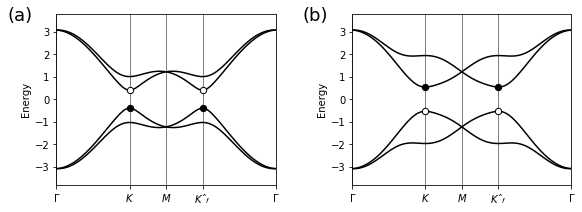

In [5]:
# Tight-binding 2D Kane-Mele model
# C.L. Kane and E.J. Mele, PRL 95, 146802 (2005)
from pythtb import * # import TB model class
import matplotlib.pyplot as plt
# set model parameters
delta=0.7 # site energy
t=-1.0 # spin-independent first-neighbor hop
rashba=0.05 # spin-flip first-neighbor hop
soc_list=[-0.06,-0.24] # spin-dependent second-neighbor hop
def set_model(t,soc,rashba,delta):
    # set up Kane-Mele model
    lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
    orb=[[1./3.,1./3.],[2./3.,2./3.]]
    model=tb_model(2,2,lat,orb,nspin=2)
    model.set_onsite([delta,-delta])
    # definitions of Pauli matrices
    sigma_x=np.array([0.,1.,0.,0])
    sigma_y=np.array([0.,0.,1.,0]) 
    sigma_z=np.array([0.,0.,0.,1])
    r3h =np.sqrt(3.0)/2.0
    sigma_a= 0.5*sigma_x-r3h*sigma_y
    sigma_b= 0.5*sigma_x+r3h*sigma_y
    sigma_c=-1.0*sigma_x
    # spin-independent first-neighbor hops
    for lvec in ([ 0, 0], [-1, 0], [ 0,-1]):
        model.set_hop(t, 0, 1, lvec)
    # spin-dependent second-neighbor hops
    for lvec in ([ 1, 0], [-1, 1], [ 0,-1]):
        model.set_hop(soc*1.j*sigma_z, 0, 0, lvec)
    for lvec in ([-1, 0], [ 1,-1], [ 0, 1]):
        model.set_hop(soc*1.j*sigma_z, 1, 1, lvec)
    # spin-flip first-neighbor hops
    model.set_hop(1.j*rashba*sigma_a, 0, 1, [ 0, 0], mode="add")
    model.set_hop(1.j*rashba*sigma_b, 0, 1, [-1, 0], mode="add")
    model.set_hop(1.j*rashba*sigma_c, 0, 1, [ 0,-1], mode="add")
    return model
# construct path in k-space and solve model
path=[[0.,0.],[2./3.,1./3.],[.5,.5],[1./3.,2./3.], [0.,0.]]
label=(r'$\Gamma $',r'$K$', r'$M$', r'$Kˆ\prime$', r'$\Gamma $')
(k_vec,k_dist,k_node)=set_model(t,0.,rashba,delta).k_path(path,101)
# set up band structure plots
fig, ax = plt.subplots(1,2,figsize=(8.,3.))
labs=['(a)','(b)']
for j in range(2):
    my_model=set_model(t,soc_list[j],rashba,delta)
    evals=my_model.solve_all(k_vec)
    ax[j].set_xlim([0,k_node[-1]])
    ax[j].set_xticks(k_node)
    ax[j].set_xticklabels(label)
    for n in range(len(k_node)):
        ax[j].axvline(x=k_node[n],linewidth=0.5, color='k')
    ax[j].set_ylabel("Energy")
    ax[j].set_ylim(-3.8,3.8)
    for n in range(4):
        ax[j].plot(k_dist,evals[n],color='k')
    for m in [1,3]:
        kk=k_node[m]
        en=my_model.solve_one(path[m])
        en=en[1:3] # pick out second and third bands
        if j==1: # exchange them in second plot
            en=[en[1],en[0]]
        ax[j].scatter(kk,en[0],s=40.,marker='o',color='k',zorder=6)
        ax[j].scatter(kk,en[1],s=40.,marker='o',edgecolors='k',
            facecolors='w',zorder=4)
    ax[j].text(-0.45,3.5,labs[j],size=18.)
# save figure as a PDF
fig.tight_layout()
plt.subplots_adjust(wspace=0.35)